In [10]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from collections import Counter
from urlextract import URLExtract
from wordcloud import WordCloud
from urllib.parse import urlparse

In [11]:
f = open("kk.txt",'r',encoding='utf-8')

In [12]:
data = f.read()

In [13]:
# Regular expression pattern
pattern = r'(\d+/\d+/\d+, \d+:\d+\s*[ap]m) - ([^:]+): (.*)'

# Find matches in the chat data
matches = re.findall(pattern, data)

# Create lists to store extracted data
timestamps, senders, messages = [], [], []

# Iterate through matches and extract data
for match in matches:
    timestamps.append(match[0])
    senders.append(match[1])
    messages.append(match[2])

# Create a DataFrame from the lists
df = pd.DataFrame({"timestamp": timestamps, "sender": senders, "message": messages})

# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df['timestamp'], format="%d/%m/%Y, %I:%M %p") 

# Display the DataFrame
df.tail()

,timestamp,sender,message
720,2020-03-05 14:59:00,Vijay Murthy,Vera ena pana
721,2020-03-05 15:02:00,Vijay Murthy,9003225576
722,2020-03-05 15:02:00,Vijay Murthy,Idan metro srinivasan number
723,2020-03-05 15:02:00,Karti,Ok
724,2020-03-05 15:03:00,Vijay Murthy,Udanae call paniru


In [14]:
## Nummber of messages by each member of the group

In [16]:
# Create sender counts as a seriestimestamp
sender_count_series = df["sender"].value_counts()
sender_count_series

sender
Karti           384
Vijay Murthy    341
Name: count, dtype: int64

<Axes: xlabel='sender'>

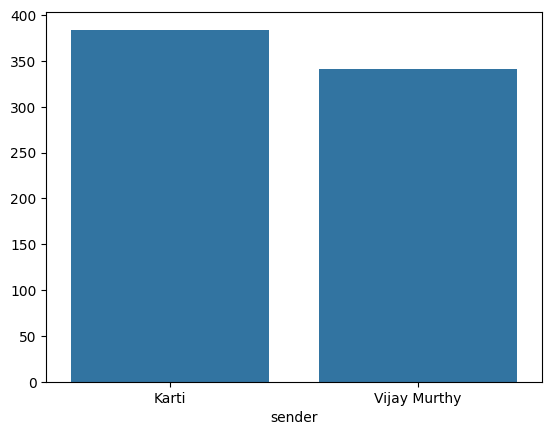

In [17]:
sns.barplot(x=sender_count_series.index, y=sender_count_series.values)

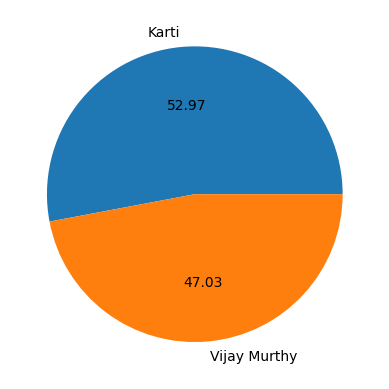

In [18]:
plt.pie(sender_count_series.values, labels= sender_count_series.index, autopct = "%0.2f")
plt.show()

In [61]:
## Most Used emoji

In [19]:
emojis = []
users = sender_count_series.index

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [20]:
a = pd.DataFrame(Counter(emojis).most_common(170)) 

In [21]:
a

,0,1
0,🤣,125
1,🏻,48
2,👌,34
3,😆,21
4,😛,13
5,😍,9
6,🥵,9
7,🥴,9
8,🤩,8
9,😅,8


In [22]:
# Assuming df is your DataFrame with columns: 'user', 'message'
emojis_by_user = {}

for index, row in df.iterrows():
    sender = row['sender']
    message = row['message']

    emojis = [c for c in message if c in emoji.EMOJI_DATA]

    if sender not in emojis_by_user:
        emojis_by_user[sender] = emojis
    else:
        emojis_by_user[sender].extend(emojis)


user_to_analyze = 'karti 😥'
user_emojis = emojis_by_user.get(user_to_analyze, [])

# Get the most common emojis used by the user
most_common_emojis = Counter(user_emojis).most_common(10)  # Change 10 to any desired number

# Display the result
print(f"Most common emojis used by {user_to_analyze}:")
most_common_emojis


Most common emojis used by karti 😥:


[]

In [23]:
extractor = URLExtract()

links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

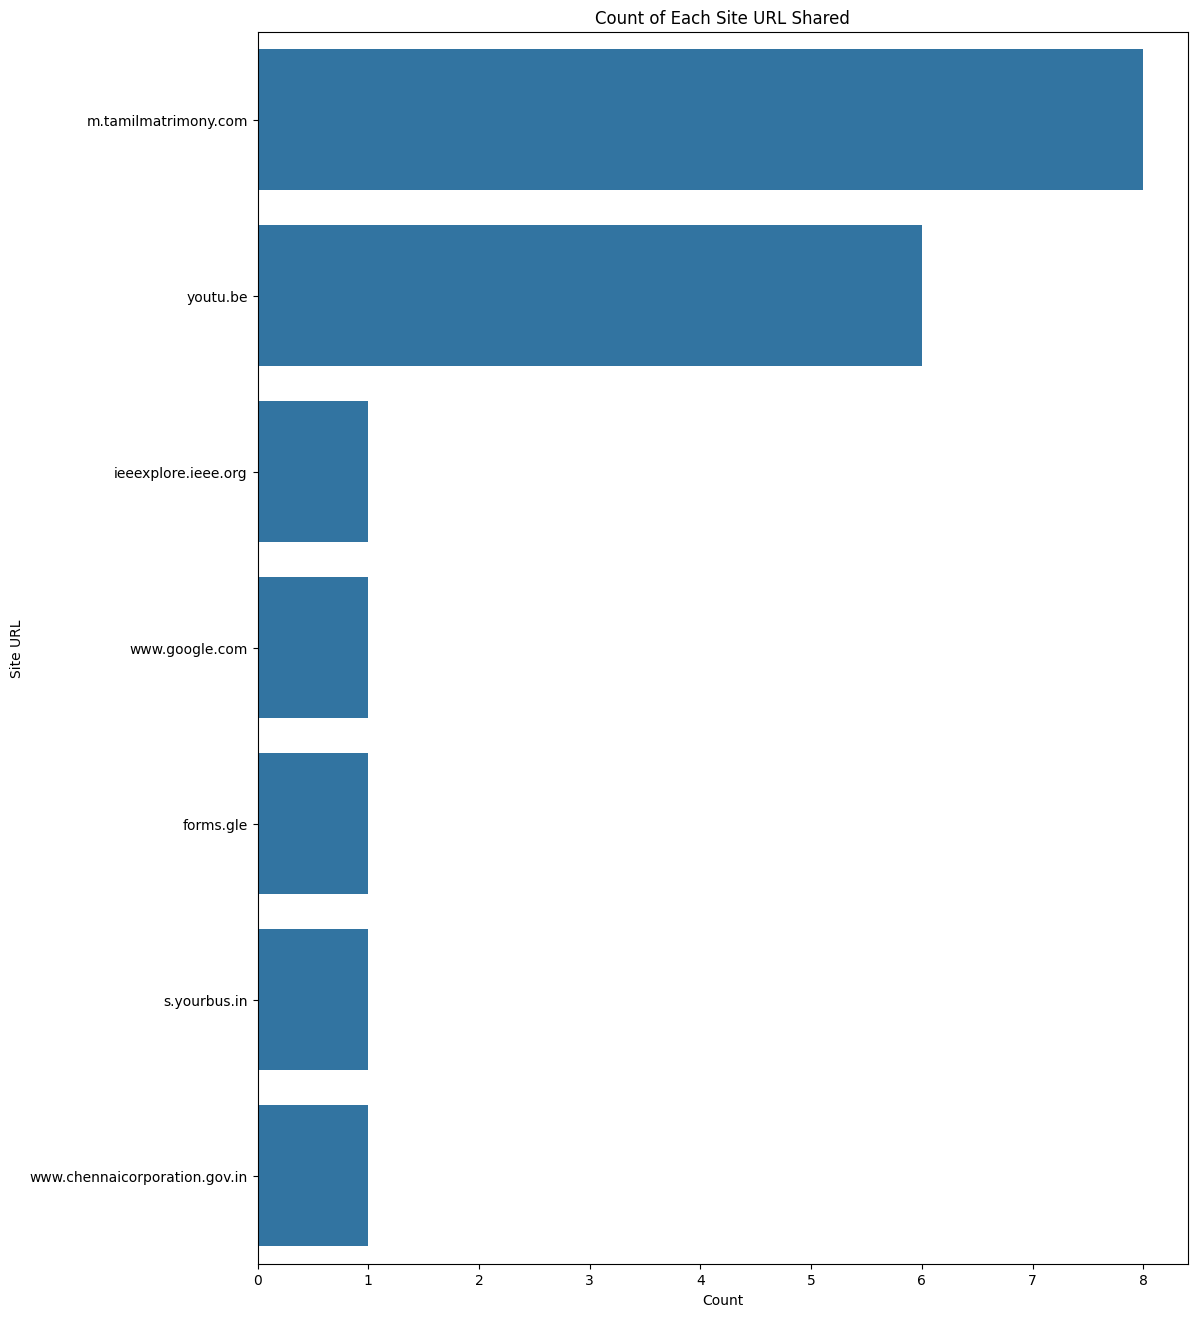

In [24]:
parsed_urls = [urlparse(url) for url in links]
domains = [parsed_url.netloc for parsed_url in parsed_urls]

# Create a DataFrame
df1 = pd.DataFrame({'Domain': domains})

# Create a countplot
plt.figure(figsize=(12, 16))
sns.countplot(y='Domain', data=df1, order=df1['Domain'].value_counts().index)
plt.title('Count of Each Site URL Shared')
plt.xlabel('Count')
plt.ylabel('Site URL')
plt.show()

In [25]:
# Making more columns like year, months,days,hours,minutes

In [26]:
# Extract additional columns from the timestamp
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month_name()
df['day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df.head()

,timestamp,sender,message,year,month,day,hour,minute
0,2020-01-11 18:12:00,Karti,IMG-20200111-WA0058.jpg (file attached),2020,January,Saturday,18,12
1,2020-01-11 18:12:00,Karti,IMG-20200111-WA0057.jpg (file attached),2020,January,Saturday,18,12
2,2020-01-11 18:12:00,Karti,IMG-20200111-WA0049.jpg (file attached),2020,January,Saturday,18,12
3,2020-01-11 18:12:00,Karti,IMG-20200111-WA0056.jpg (file attached),2020,January,Saturday,18,12
4,2020-01-11 18:12:00,Karti,IMG-20200111-WA0055.jpg (file attached),2020,January,Saturday,18,12


In [27]:
# Finding the month name in which users are more active

In [28]:
monthData = df['month'].value_counts()
monthData

month
February    476
January     221
March        28
Name: count, dtype: int64

<Axes: xlabel='month'>

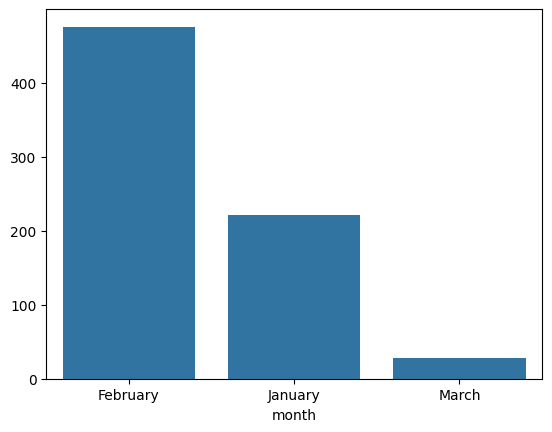

In [29]:
sns.barplot(x=monthData.index, y=monthData.values)

In [30]:
# Finding the Week name in which users are more active

In [31]:
weekData = df['day'].value_counts()
weekData

day
Thursday     177
Wednesday    138
Monday        97
Saturday      89
Sunday        89
Tuesday       82
Friday        53
Name: count, dtype: int64

<Axes: xlabel='day'>

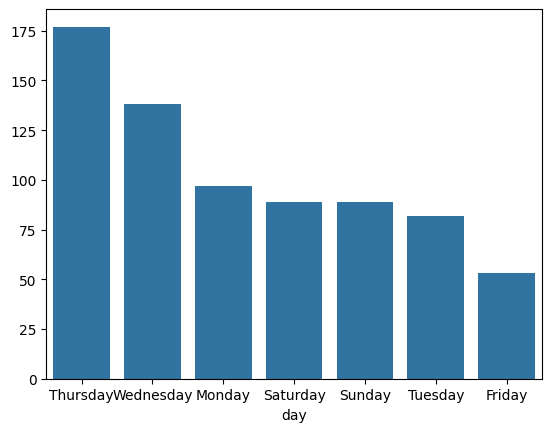

In [32]:
sns.barplot(x=weekData.index, y=weekData.values)

In [33]:
# Yearwise Timeline

year  month   
2020  February    476
      January     221
      March        28
Name: message, dtype: int64


<Axes: xlabel='year', ylabel='count'>

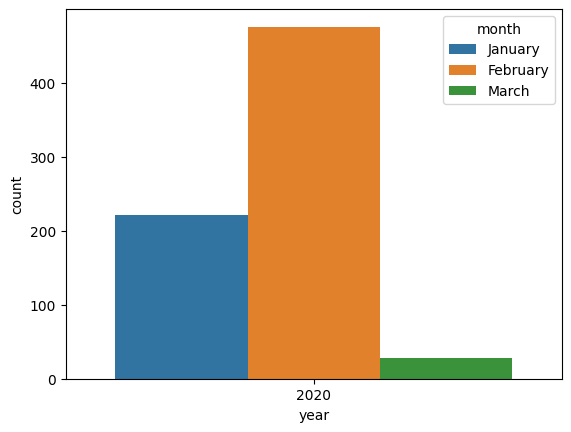

In [34]:
timeline = df.groupby(['year','month']).count()['message']
print(timeline)
sns.countplot(x='year', hue='month', data=df)

In [35]:
# Now Finding those words which repeatly more and more time

In [36]:
temp = df[df['sender'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [37]:
f = open('stop_hinglish.txt')
stop_words = f.read()
print("stop words\n",stop_words)

stop words
 .
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
come

In [38]:
words = ""
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words += word + ' '

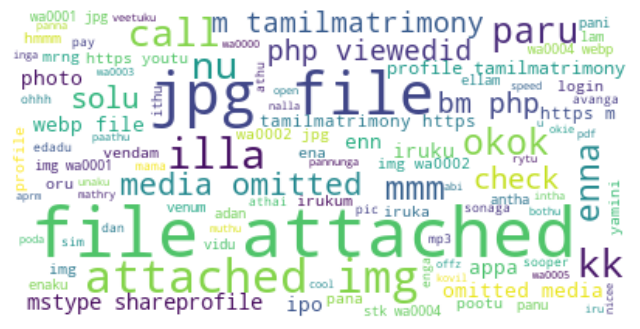

In [39]:
wordcloud = WordCloud(max_words=100, background_color="white").generate(words)
# Display the word cloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("flirting_rated.csv")
# You can repeat similar steps using TF-IDF for Random Forest and SVM

In [41]:
df

,polarity,final_messages
0,0.0,Why do u say that Kat
1,0.0,Hey Lizzie what’s ur most played song on Spoti...
2,0.0,Haha drivers license for me too but most recen...
3,0.0,Frank is always on repeat tho
4,0.0,Aw thank youuu I see u like Frank too what is ...
...,...,...
2881,0.0,"i don't watch reality tv, no clue"
2882,0.0,what kind of air guitars?
2883,0.0,i have an epiphone
2884,0.0,but favourite?


In [42]:
# Extra cleaning
df = df.dropna()

In [43]:
df

,polarity,final_messages
0,0.0,Why do u say that Kat
1,0.0,Hey Lizzie what’s ur most played song on Spoti...
2,0.0,Haha drivers license for me too but most recen...
3,0.0,Frank is always on repeat tho
4,0.0,Aw thank youuu I see u like Frank too what is ...
...,...,...
2881,0.0,"i don't watch reality tv, no clue"
2882,0.0,what kind of air guitars?
2883,0.0,i have an epiphone
2884,0.0,but favourite?


In [44]:
# Step 1: Split Data
X = df['final_messages']
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Step 2: Feature Extraction using Count Vectorizer
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Step 3: Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [46]:
# Step 4: Apply Logistic Regression (Classification Model)
log_reg = LogisticRegression()
log_reg.fit(X_train_counts, y_train)
y_pred_logreg = log_reg.predict(X_test_counts)
print("Logistic Regression (Count Vectorizer) Results:\n", classification_report(y_test, y_pred_logreg))
# Apply Logistic Regression with TF-IDF
log_reg_tfidf = LogisticRegression()
log_reg_tfidf.fit(X_train_tfidf, y_train)
y_pred_logreg_tfidf = log_reg_tfidf.predict(X_test_tfidf)
print("Logistic Regression (TF-IDF) Results:\n", classification_report(y_test, y_pred_logreg_tfidf))

# Step 5: Apply Support Vector Machine (SVM)
svc = SVC()
svc.fit(X_train_counts, y_train)
y_pred_svc = svc.predict(X_test_counts)
print("SVM (Count Vectorizer) Results:\n", classification_report(y_test, y_pred_svc))

# Step 6: Apply Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_counts, y_train)
y_pred_rf = rf.predict(X_test_counts)
print("Random Forest (Count Vectorizer) Results:\n", classification_report(y_test, y_pred_rf))

# You can repeat similar steps using TF-IDF for Random Forest and SVM

Logistic Regression (Count Vectorizer) Results:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.92       479
         1.0       0.74      0.30      0.43        96

    accuracy                           0.87       575
   macro avg       0.81      0.64      0.68       575
weighted avg       0.85      0.87      0.84       575

Logistic Regression (TF-IDF) Results:
               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       479
         1.0       0.92      0.24      0.38        96

    accuracy                           0.87       575
   macro avg       0.89      0.62      0.65       575
weighted avg       0.88      0.87      0.84       575

SVM (Count Vectorizer) Results:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       479
         1.0       0.95      0.22      0.36        96

    accuracy                           0.87       575
   macr

In [49]:
# Save the trained model to disk using pickle
import pickle
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

print("Model saved to", filename)

Model saved to random_forest_model.pkl


In [51]:
# Load the model back from disk
with open(filename, 'rb') as file:
    loaded_rf = pickle.load(file)

# Make predictions with the loaded model
y_pred_loaded_rf = loaded_rf.predict(X_test_counts)
print(y_pred_loaded_rf)
# Evaluate the loaded model
print("Random Forest (Loaded Model) Results:\n", classification_report(y_test, y_pred_loaded_rf))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.